In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv


# Customer Segmentation using K-Means Clustering
The main goal of this project is to identify distinct customer groups based on purchasing patterns, demographics, and engagement behavior for better marketing strategies.

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data cleaning

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Change the data type of Dt_Customer column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
print(df['Dt_Customer'].dtypes)

datetime64[ns]


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* As we have only few values so we will drop the null values

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(2216, 29)

In [9]:
df.duplicated().sum()

0

* No duplicate row found

## Feature Engineering

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### 1. Dropping uncessary columns

In [11]:
df.drop(['ID','Z_CostContact','Z_Revenue','Response','Complain'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],
      dtype='object')

### 2. Let's create a Age feature

In [13]:
from datetime import datetime

df['Age'] = datetime.now().year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

### 3. Let's create a Tenure Feature (Customer Duration)
From 'Dt_Customer' (date of enrollment) colum to check how long the person has been a customer.

In [14]:
df['Tenure'] = (datetime.now() - df['Dt_Customer']).dt.days
df.drop('Dt_Customer', axis=1, inplace=True)

### 4. Let's create a Family Size Feature

We will combine 'Kidhome' and 'Teenhome' to represent total dependents at home.

In [15]:
df['Family_Members'] = df['Kidhome'] + df['Teenhome'] + 2 #Assuming 2 Adults
df.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

### 5. Let's combine Spending related features
All these columns represent different spending categories:

In [16]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
 'MntSweetProducts', 'MntGoldProds']

df['Total_Spending'] = df[spending_cols].sum(axis=1)
df.drop(spending_cols, axis=1,inplace=True)

### 6. Let's combine Purchase related features

In [17]:
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']
df['Total_Purchase'] = df[purchase_cols].sum(axis=1)

#Let's create one column for Online Purchase
df['Online_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df.drop(purchase_cols, axis=1, inplace=True )

### 7. Let's create a column for Campaign Success Rate

In [18]:
camp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
             'AcceptedCmp4', 'AcceptedCmp5']

df['Total_Accepted'] = df[camp_cols].sum(axis=1)
df.drop(camp_cols, axis=1, inplace=True)

### 8. Let's Encode Categorical Variables

In [19]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

* We will club last three values as Others

In [21]:
#rare categories
rare_categories = ['Widow','Alone','Absurd','YOLO']

# Replace them with 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(rare_categories,'Others')

In [22]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Others       83
Name: count, dtype: int64

### Let's encode these categorical columns

In [23]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Marital_Status','Education'], drop_first=True,
                    dtype = int)

In [24]:
df.head()

,Income,Recency,Age,Tenure,Family_Members,Total_Spending,Total_Purchase,Online_Purchase,Total_Accepted,Marital_Status_Married,Marital_Status_Others,Marital_Status_Single,Marital_Status_Together,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,58,68,4799,2,1617,32,18,0,0,0,1,0,0,1,0,0
1,46344.0,38,71,4249,4,27,11,2,0,0,0,1,0,0,1,0,0
2,71613.0,26,60,4448,2,776,25,10,0,0,0,0,1,0,1,0,0
3,26646.0,26,41,4275,3,53,14,2,0,0,0,0,1,0,1,0,0
4,58293.0,94,44,4297,3,422,24,8,0,1,0,0,0,0,0,0,1


### 9. Scale Numerical Features
We will scale all features to avoid dominance of large-scale features like Income or Spending.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [26]:
df_scaled = pd.DataFrame(X_scaled, columns = df.columns)

In [27]:
df_scaled.head()

,Income,Recency,Age,Tenure,Family_Members,Total_Spending,Total_Purchase,Online_Purchase,Total_Accepted,Marital_Status_Married,Marital_Status_Others,Marital_Status_Single,Marital_Status_Together,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.234063,0.310532,0.986443,1.529129,-1.264803,1.675488,1.620547,2.382293,-0.439265,-0.794110,-0.197262,1.924807,-0.590553,-0.158041,0.992806,-0.444062,-0.526530
1,-0.234559,-0.380509,1.236801,-1.188411,1.405806,-0.962358,-1.263455,-1.007761,-0.439265,-0.794110,-0.197262,1.924807,-0.590553,-0.158041,0.992806,-0.444062,-0.526530
2,0.769478,-0.795134,0.318822,-0.205155,-1.264803,0.280250,0.659213,0.687266,-0.439265,-0.794110,-0.197262,-0.519533,1.693329,-0.158041,0.992806,-0.444062,-0.526530
3,-1.017239,-0.795134,-1.266777,-1.059945,0.070501,-0.919224,-0.851455,-1.007761,-0.439265,-0.794110,-0.197262,-0.519533,1.693329,-0.158041,0.992806,-0.444062,-0.526530
4,0.240221,1.554407,-1.016420,-0.951244,0.070501,-0.307044,0.521879,0.263509,-0.439265,1.259271,-0.197262,-0.519533,-0.590553,-0.158041,-1.007246,-0.444062,1.899228


## Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_scaled.columns

Index(['Income', 'Recency', 'Age', 'Tenure', 'Family_Members',
       'Total_Spending', 'Total_Purchase', 'Online_Purchase', 'Total_Accepted',
       'Marital_Status_Married', 'Marital_Status_Others',
       'Marital_Status_Single', 'Marital_Status_Together', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

In [30]:
## Let's check the correlation of the columns
cols = ['Income', 'Recency', 'Age', 'Tenure', 'Family_Members',
       'Total_Spending', 'Total_Purchase','Online_Purchase', 'Total_Accepted']

corr_matrix = df_scaled[cols].corr()

In [31]:
corr_matrix

,Income,Recency,Age,Tenure,Family_Members,Total_Spending,Total_Purchase,Online_Purchase,Total_Accepted
Income,1.000000,-0.003970,0.161791,-0.018531,-0.293352,0.667576,0.412871,0.590473,0.308381
Recency,-0.003970,1.000000,0.016295,0.025963,0.018290,0.020066,0.001737,0.011655,-0.013647
Age,0.161791,0.016295,1.000000,-0.020305,0.087398,0.113487,0.137848,0.164354,0.002289
Tenure,-0.018531,0.025963,-0.020305,1.000000,-0.025941,0.158577,0.311663,0.172437,-0.012009
Family_Members,-0.293352,0.018290,0.087398,-0.025941,1.000000,-0.500244,-0.124760,-0.361378,-0.245891
Total_Spending,0.667576,0.020066,0.113487,0.158577,-0.500244,1.000000,0.630477,0.791008,0.457095
Total_Purchase,0.412871,0.001737,0.137848,0.311663,-0.124760,0.630477,1.000000,0.842620,0.215371
Online_Purchase,0.590473,0.011655,0.164354,0.172437,-0.361378,0.791008,0.842620,1.000000,0.328926
Total_Accepted,0.308381,-0.013647,0.002289,-0.012009,-0.245891,0.457095,0.215371,0.328926,1.000000


<Axes: >

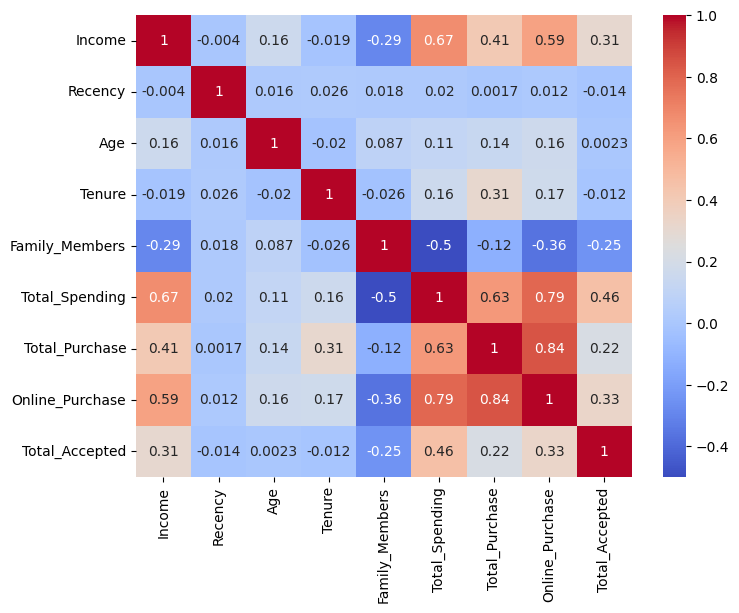

In [32]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [33]:
corr_matrix[abs(corr_matrix) > 0.8]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Income,Recency,Age,Tenure,Family_Members,Total_Spending,Total_Purchase,Online_Purchase,Total_Accepted
Income,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Family_Members,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Total_Spending,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Total_Purchase,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.84262,NaN
Online_Purchase,NaN,NaN,NaN,NaN,NaN,NaN,0.84262,1.00000,NaN
Total_Accepted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


* Since Total Purhcase and Online Purchase are two highly correlated columns so will drop one

In [34]:
df_scaled.drop('Online_Purchase', axis=1, inplace = True)

## Find the Optimal Number of Clusters (k) using Elbow Method
Before clustering, will determine how many clusters (k) make sense. 

In [35]:
df_scaled.columns

Index(['Income', 'Recency', 'Age', 'Tenure', 'Family_Members',
       'Total_Spending', 'Total_Purchase', 'Total_Accepted',
       'Marital_Status_Married', 'Marital_Status_Others',
       'Marital_Status_Single', 'Marital_Status_Together', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

In [36]:
# Will take only numerical features as generaly clustering performs better.
X = ['Income', 'Recency', 'Age', 'Tenure', 'Family_Members',
       'Total_Spending', 'Total_Purchase', 'Total_Accepted']

selected_features = X

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

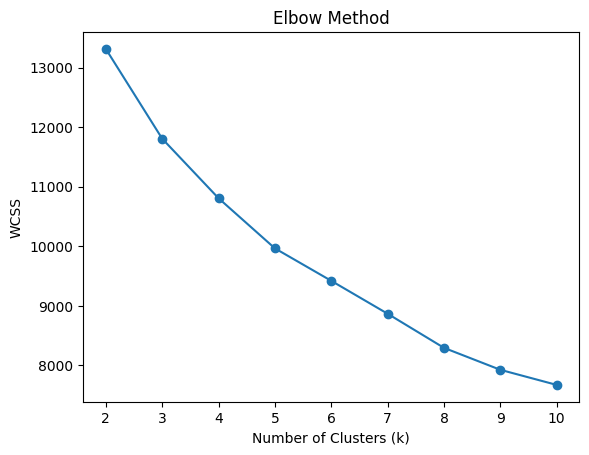

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[selected_features])
    wcss.append(kmeans.inertia_)

# Will plot the Within-Cluster Sum of Squares (WCSS) vs k.
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

* As the elbow curve bends at 5 so will value of k = 5

## Applying Clustering Algorithm

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=5,       
    init='k-means++', 
    n_init=10,          # To run the algorithm 10 times with different seeds
    random_state=42)

df['Clusters'] = kmeans.fit_predict(df_scaled[selected_features])

## Analyzing the Clusters (Segmentation Insights)

In [39]:
cluster_summary = df.groupby('Clusters')[selected_features].mean()

In [40]:
cluster_summary

,Income,Recency,Age,Tenure,Family_Members,Total_Spending,Total_Purchase,Total_Accepted
Clusters,,,,,,,,
0,75468.289532,50.636971,57.452116,4435.886414,2.184855,1261.077951,22.498886,0.316258
1,31086.603395,47.932099,47.870370,4481.259259,2.822531,113.168210,14.648148,0.078704
2,84255.924812,48.060150,54.842105,4487.601504,2.323308,1541.804511,24.744361,2.481203
3,43896.572340,51.495745,62.031915,4391.825532,3.827660,145.506383,15.423404,0.100000
4,57971.125969,46.939922,60.521318,4636.048450,3.125969,837.740310,28.350775,0.176357


* From summary we can see customers with cluster label 2 has high income and high spending
* Customers with cluster label 4 has low income and less purchasing

## Dimensionality Reduction for Visualization

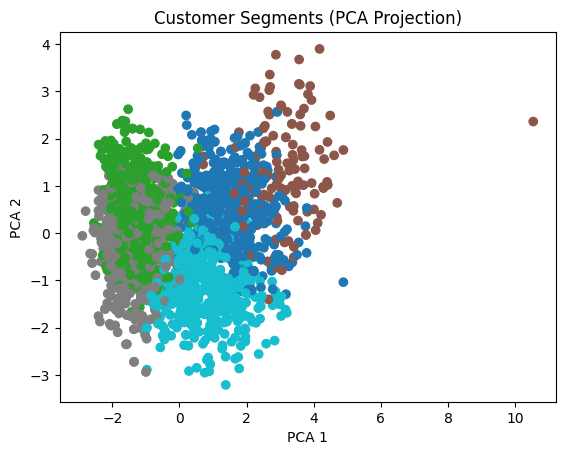

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled[selected_features])

# Plot the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Clusters'], cmap='tab10')
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#### Let's show the cluster centroids (means of each cluster in PCA space) on the scatter plot

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


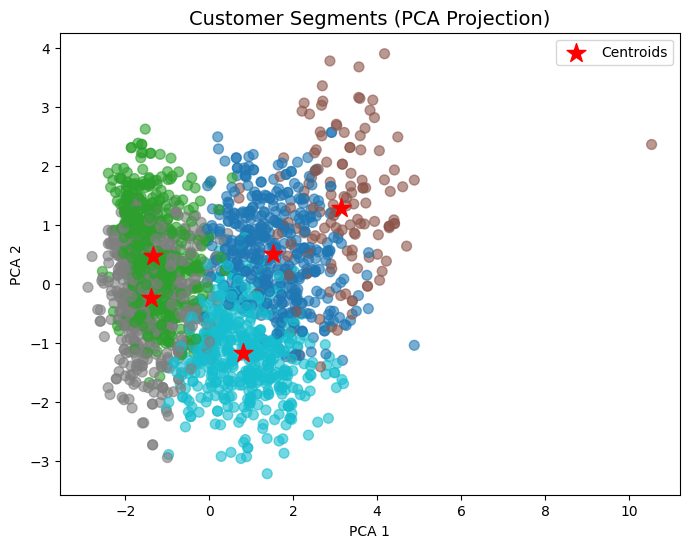

In [42]:
# Transform centroids into PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], 
            c=df['Clusters'], cmap='tab10', alpha=0.6, s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            marker='*', s=200, c='red', label='Centroids')
plt.title('Customer Segments (PCA Projection)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## Importing Summary Table Output

In [43]:
cluster_summary.to_csv('cluster_summary_report.csv')

## Overall Insights

* Cluster 2 (VIPs): Our most valuable customers—most profitable, most loyal, and highly responsive to campaigns - Focus on retention and reward programs.

* Clusters 1 & 3 (Low Engagement): Minimal spending and low engagement - Attempt low-cost reactivation, but otherwise minimize marketing spend to avoid wasted resources.

* Cluster 0 (High Potential): High income but only average spending. They represent untapped potential - Approach with personalized, high-value campaigns to boost engagement.

* Cluster 4 (Mid-Tier): A stable, reliable group offering good foundational business - Drive growth with tailored offers and upgrades to increase their spending.

## Business Recommendations


* Focus retention efforts and premium offerings on Cluster 2.

* Encourage Cluster 0 customers with personalized promotions to convert high income into higher spending.

* For Cluster 1 and Cluster 3, use low-cost marketing (SMS/email) or awareness campaigns.

* Build loyalty programs for Cluster 4 to move them toward premium segments.